<a href="https://www.kaggle.com/code/indranilbhadra/mcdonalds-case-study?scriptVersionId=211908696" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import os
import warnings
from scipy.stats import entropy
import seaborn as sns
from sklearn.linear_model import LinearRegression
from statsmodels.api import OLS, add_constant
from sklearn.utils import shuffle
from sklearn.metrics import adjusted_rand_score
from joblib import Parallel, delayed
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.mixture import GaussianMixture
from collections import Counter
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

## Step 3

In [2]:
data = pd.read_csv("/kaggle/input/mcdonalds/mcdonalds.csv") # loading data

In [3]:
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


## Step 4 Exploring the data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [5]:
data.shape

(1453, 15)

In [6]:
data.columns.values.tolist()

['yummy',
 'convenient',
 'spicy',
 'fattening',
 'greasy',
 'fast',
 'cheap',
 'tasty',
 'expensive',
 'healthy',
 'disgusting',
 'Like',
 'Age',
 'VisitFrequency',
 'Gender']

In [7]:
from sklearn.preprocessing import LabelEncoder
df_encoded = data.apply(LabelEncoder().fit_transform)

In [8]:
df_encoded.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,6,43,0,0
1,1,1,0,1,1,1,1,1,1,0,0,1,33,0,0
2,0,1,1,1,1,1,0,1,1,1,0,0,44,0,0
3,1,1,0,1,1,1,1,1,0,0,1,3,51,4,0
4,0,1,0,1,1,1,1,0,0,1,0,1,31,3,1


In [9]:
mean = round(df_encoded.mean(),2)
mean

yummy              0.55
convenient         0.91
spicy              0.09
fattening          0.87
greasy             0.53
fast               0.90
cheap              0.60
tasty              0.64
expensive          0.36
healthy            0.20
disgusting         0.24
Like               4.64
Age               26.60
VisitFrequency     2.64
Gender             0.46
dtype: float64

In [10]:
pca = PCA()
df_pca = pca.fit_transform(df_encoded.iloc[:,0:11])

df_p = pca.fit(df_encoded.iloc[:,0:11])

standard_deviation = np.sqrt(pca.explained_variance_)
proportion_variance = pca.explained_variance_ratio_

index = []

for i in range(len(standard_deviation)):
    i=i+1
    index.append("PCA{}".format(i))

PCA_df=pd.DataFrame({
    "Standard deviation":standard_deviation,"Proportion of Variance":proportion_variance,"Cumulative Proportion":proportion_variance.cumsum()
},index=index)

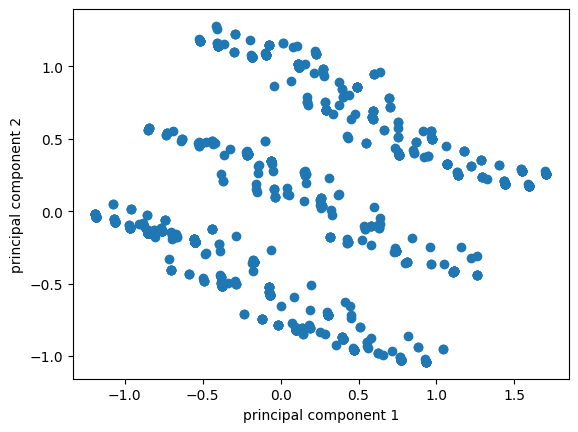

In [11]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(df_encoded.iloc[:,0:11])

pca = PCA(n_components=2)
p = pca.fit_transform(df_encoded.iloc[:,0:11])

fig, ax = plt.subplots()

ax.scatter(p[:, 0], p[:, 1],cmap='virdis')
ax.set_xlabel('principal component 1')
ax.set_ylabel('principal component 2')
plt.show()

In [12]:
PCA_df

,Standard deviation,Proportion of Variance,Cumulative Proportion
PCA1,0.757050,0.299447,0.299447
PCA2,0.607456,0.192797,0.492244
PCA3,0.504619,0.133045,0.625290
PCA4,0.398799,0.083096,0.708386
PCA5,0.337405,0.059481,0.767866
PCA6,0.310275,0.050300,0.818166
PCA7,0.289697,0.043849,0.862015
PCA8,0.275122,0.039548,0.901563
PCA9,0.265251,0.036761,0.938323
PCA10,0.248842,0.032353,0.970677


In [13]:
print("Standard Deviation:\n",standard_deviation.round(1))

load_pca_components = (pca.components_)
i=0
rotation_matrix = df_p.components_.T

rotation_df = pd.DataFrame(rotation_matrix, index=df_encoded.iloc[:,0:11].columns.values, columns=index)
rotation_df=round(-rotation_df,3)
rotation_df

Standard Deviation:
 [0.8 0.6 0.5 0.4 0.3 0.3 0.3 0.3 0.3 0.2 0.2]


,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11
yummy,0.477,-0.364,0.304,-0.055,0.308,-0.171,0.281,-0.013,-0.572,0.110,-0.045
convenient,0.155,-0.016,0.063,0.142,-0.278,0.348,0.060,0.113,0.018,0.666,0.542
spicy,0.006,-0.019,0.037,-0.198,-0.071,0.355,-0.708,-0.376,-0.400,0.076,-0.142
fattening,-0.116,0.034,0.322,0.354,0.073,0.407,0.386,-0.590,0.161,0.005,-0.251
greasy,-0.304,0.064,0.802,-0.254,-0.361,-0.209,-0.036,0.138,0.003,-0.009,-0.002
fast,0.108,0.087,0.065,0.097,-0.108,0.595,0.087,0.628,-0.166,-0.240,-0.339
cheap,0.337,0.611,0.149,-0.119,0.129,0.103,0.040,-0.140,-0.076,-0.428,0.489
tasty,0.472,-0.307,0.287,0.003,0.211,0.077,-0.360,0.073,0.639,-0.079,-0.020
expensive,-0.329,-0.601,-0.024,-0.068,0.003,0.261,0.068,-0.030,-0.067,-0.454,0.490
healthy,0.214,-0.077,-0.192,-0.763,-0.288,0.178,0.350,-0.176,0.186,0.038,-0.158


In [14]:
pip install bioinfokit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.1/88.1 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Created wheel for bioinfokit: filename=bioinfokit-2.1.4-py3-none-any.whl size=59221 sha256=710e470a17a8a5e3c234193bdc5243844e339f47c270b2198f1adfab768fbe68
  Stored in directory: /root/.cache/pip/wheels/45/b1/91/212510cab723ee76a25180836e8897f926820382374184b017
Successfully built bioinfokit
Note: you may need to restart the kernel to use updated packages.


In [15]:
from bioinfokit.visuz import cluster

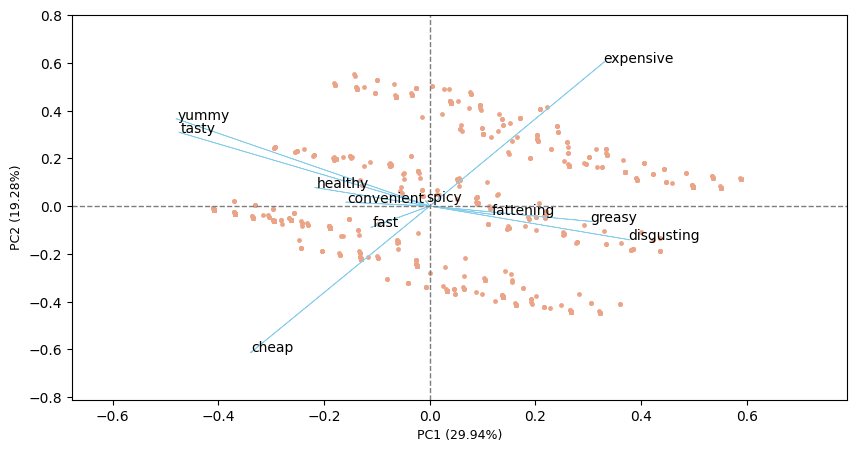

In [16]:
cluster.biplot(cscore=df_pca, loadings=pca.components_, labels=df_encoded.iloc[:,0:11].columns.values,
               var1=round(pca.explained_variance_ratio_[0]*100, 2),
    var2=round(pca.explained_variance_ratio_[1]*100, 2),show=True,dim=(10,5))

## Step 5 : Extracting the segments

In [17]:
MD = df_encoded.iloc[:,0:11]

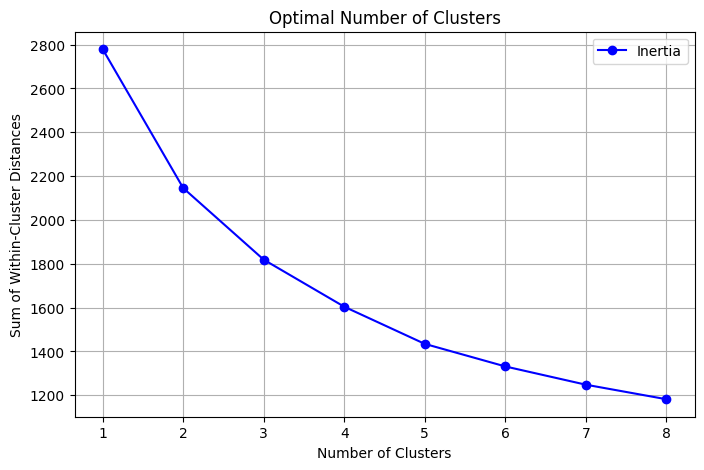

In [18]:

np.random.seed(1234)

restarts = 10
clusters_range = range(1, 9)
inertia_values = []
kmeans_results = {}


for num_clusters in clusters_range:
    kmeans_model = KMeans(n_clusters=num_clusters, n_init=restarts, random_state=1234)
    kmeans_model.fit(MD)
    inertia_values.append(kmeans_model.inertia_)
    kmeans_results[str(num_clusters)] = kmeans_model


plt.figure(figsize=(8, 5))
plt.plot(clusters_range, inertia_values, marker='o', linestyle='-', color='b', label='Inertia')
plt.xlabel("Number of Clusters")
plt.ylabel("Sum of Within-Cluster Distances")
plt.title("Optimal Number of Clusters")
plt.xticks(clusters_range)
plt.grid()
plt.legend()
plt.show()


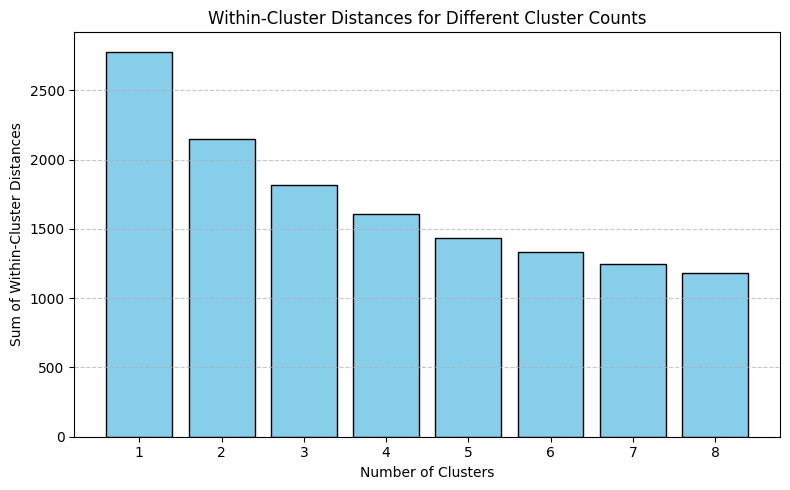

In [19]:
plt.figure(figsize=(8, 5))
plt.bar(clusters_range, inertia_values, color='skyblue', edgecolor='black')
plt.xlabel("Number of Clusters")
plt.ylabel("Sum of Within-Cluster Distances")
plt.title("Within-Cluster Distances for Different Cluster Counts")
plt.xticks(clusters_range)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

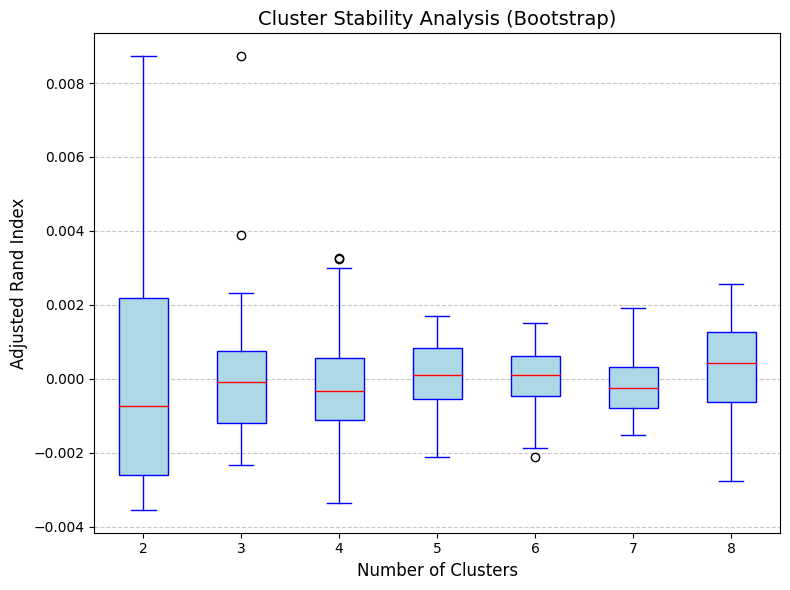

In [20]:


# Set parameters
np.random.seed(1234)
bootstrap_iterations = 30  # Reduced number of bootstraps
restarts = 10
clusters_range = range(2, 9)

# Precompute the K-means models on the original dataset
original_kmeans_models = {}
for num_clusters in clusters_range:
    kmeans = KMeans(n_clusters=num_clusters, n_init=restarts, random_state=1234)
    kmeans.fit(MD.values)
    original_kmeans_models[num_clusters] = kmeans

# Function to compute stability for a single bootstrap
def compute_stability(bootstrap_sample):
    cluster_scores = []
    for num_clusters in clusters_range:
        original_kmeans = original_kmeans_models[num_clusters]
        true_labels = original_kmeans.labels_
        
        # Fit on bootstrap sample
        kmeans_bootstrap = KMeans(n_clusters=num_clusters, n_init=restarts, random_state=1234)
        kmeans_bootstrap.fit(bootstrap_sample)
        bootstrap_labels = kmeans_bootstrap.labels_
        
        # Compute Adjusted Rand Index
        score = adjusted_rand_score(true_labels, bootstrap_labels)
        cluster_scores.append(score)
    return cluster_scores

# Parallel computation of bootstrap stability
bootstrap_samples = [shuffle(MD.values, random_state=np.random.randint(10000)) for _ in range(bootstrap_iterations)]
bootstrap_results = Parallel(n_jobs=-1)(delayed(compute_stability)(sample) for sample in bootstrap_samples)

# Convert results to a NumPy array for plotting
bootstrap_results = np.array(bootstrap_results)

# Create a boxplot for Adjusted Rand Index
plt.figure(figsize=(8, 6))
plt.boxplot(bootstrap_results, labels=list(clusters_range), patch_artist=True,
            boxprops=dict(facecolor="lightblue", color="blue"),
            medianprops=dict(color="red"),
            whiskerprops=dict(color="blue"),
            capprops=dict(color="blue"))
plt.title("Cluster Stability Analysis (Bootstrap)", fontsize=14)
plt.xlabel("Number of Clusters", fontsize=12)
plt.ylabel("Adjusted Rand Index", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


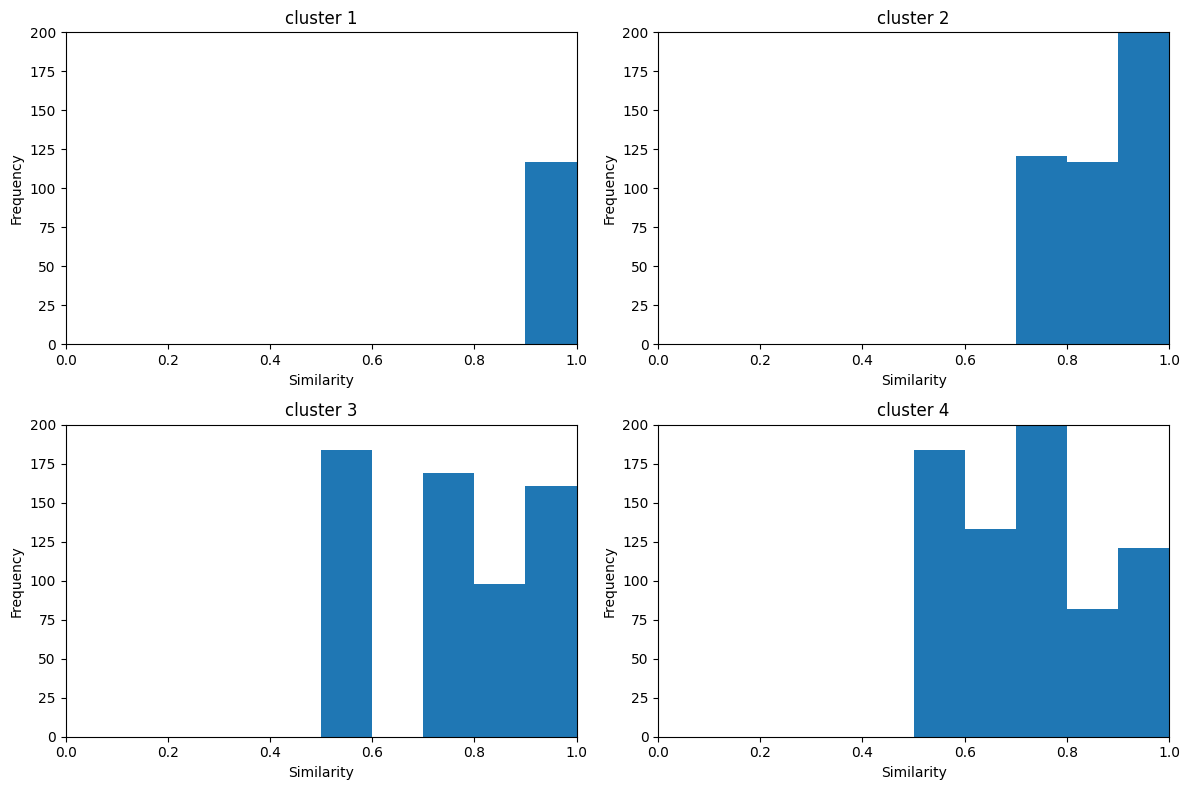

In [21]:
range_values = (0, 1)
num_bins = 10
max_frequency = 200


fig, axs = plt.subplots(2, 2, figsize=(12, 8))


for i in range(1, 5):
    labels = kmeans_results[str(i)].predict(MD)
    similarities = kmeans_results[str(i)].transform(MD).min(axis=1)
    row = (i - 1) // 2
    col = (i - 1) % 2

    axs[row, col].hist(similarities, bins=num_bins, range=range_values)
    axs[row, col].set_xlabel('Similarity')
    axs[row, col].set_ylabel('Frequency')
    axs[row, col].set_title('cluster {}'.format(i))

    axs[row, col].set_xlim(range_values)
    axs[row, col].set_ylim(0, max_frequency)


    axs[row, col].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])

plt.tight_layout()
plt.show()

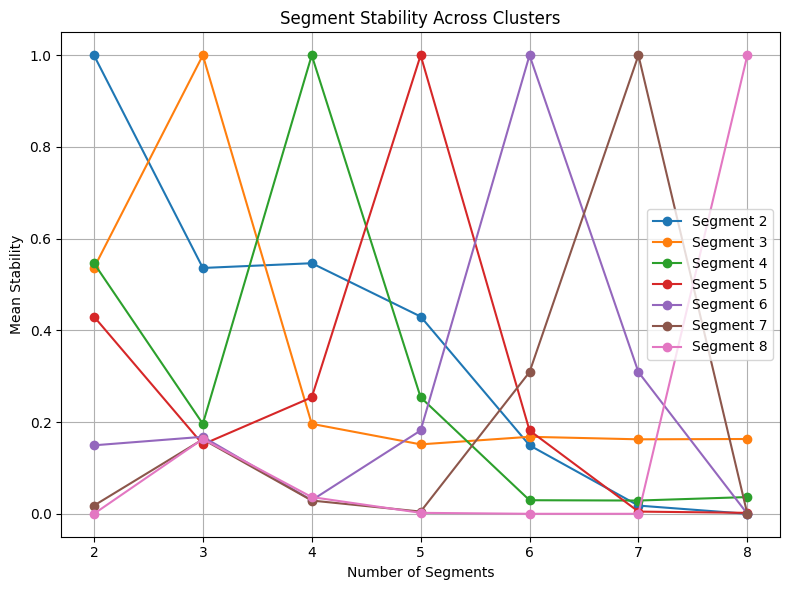

In [22]:
segments = range(2,9)
stability = []

for segs in range(2,9):
    labels = kmeans_results[str(segs)].predict(MD)
    stability.append(labels)

plt.figure(figsize=(8,6))

# Iterate through each segment and compute stability scores
for idx, segment in enumerate(range(2, 9)):
    stability_means = []
    for labels in stability:
        stability_mean = np.mean(stability[idx] == labels)
        stability_means.append(stability_mean)

    # Plot the results for the current segment
    plt.plot(segments, stability_means, marker='o', label=f'Segment {segment}')

# Add labels and legend
plt.xlabel("Number of Segments")
plt.ylabel("Mean Stability")
plt.title("Segment Stability Across Clusters")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


In [23]:
np.random.seed(1234)
MD_m28 = []

for k in range(2,9):
    model = KMeans(n_clusters=k,random_state=1234)
    model.fit(MD.values)
    converged = True
    iter_vals = model.n_iter_
    k_val = k
    k_0_val = k
    Log_L = -model.inertia_
    n_samp = MD.shape[0]
    aic = -2 * Log_L + 2 * k
    bic = -2 * Log_L + np.log(n_samp) * k
    labels = model.labels_
    counts = np.bincount(labels)
    probs = counts / float(counts.sum())
    class_entropy = entropy(probs)
    icl = bic - class_entropy
    MD_m28.append((iter_vals,converged,k_val,k_0_val,Log_L,aic,bic,icl))

MD_m28 = pd.DataFrame(MD_m28,columns=['iter_vals','converged','k','k0','Log Likelihood','AIC','BIC','ICL'])

In [24]:
MD_m28

,iter_vals,converged,k,k0,Log Likelihood,AIC,BIC,ICL
0,6,True,2,2,-2145.503727,4295.007454,4305.570225,4304.904547
1,6,True,3,3,-1818.717659,3643.435318,3659.279475,3658.209672
2,9,True,4,4,-1604.107292,3216.214583,3237.340126,3235.989403
3,11,True,5,5,-1434.610417,2879.220835,2905.627763,2904.035975
4,8,True,6,6,-1331.652440,2675.304880,2706.993194,2705.228430
5,6,True,7,7,-1248.417887,2510.835774,2547.805474,2545.884829
6,9,True,8,8,-1182.100019,2380.200037,2422.451123,2420.433939


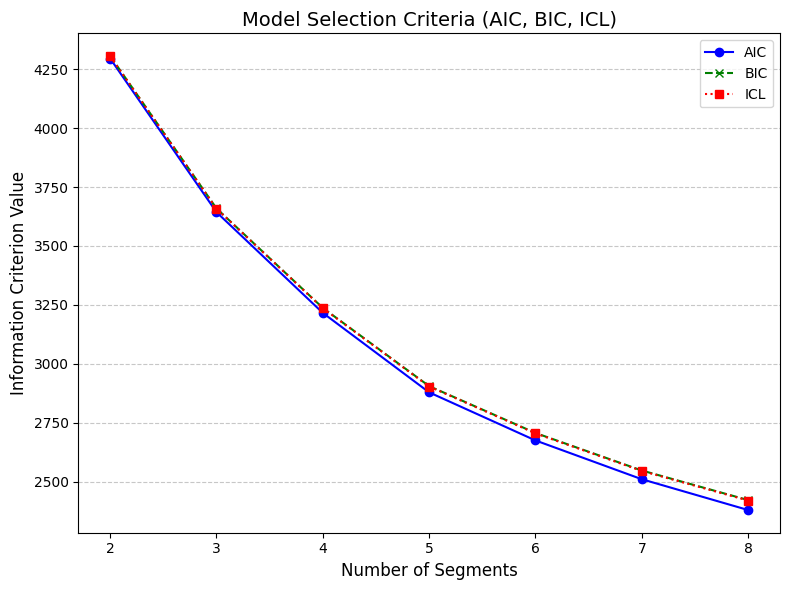

In [25]:
n_segments = MD_m28['k']
AIC = MD_m28['AIC']
BIC = MD_m28['BIC']
ICL = MD_m28['ICL']


#plotting

plt.figure(figsize=(8, 6))

# AIC plot
plt.plot(n_segments, AIC, label="AIC", marker="o", linestyle="-", color="blue")

# BIC plot
plt.plot(n_segments, BIC, label="BIC", marker="x", linestyle="--", color="green")

# ICL plot
plt.plot(n_segments, ICL, label="ICL", marker="s", linestyle=":", color="red")

# Add labels, legend, and grid
plt.xlabel("Number of Segments", fontsize=12)
plt.ylabel("Information Criterion Value", fontsize=12)
plt.title("Model Selection Criteria (AIC, BIC, ICL)", fontsize=14)
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

In [26]:
k = 4
K_m = KMeans(n_clusters=k,random_state=1234)
K_m.fit(MD)
k_clusters = K_m.predict(MD)


gmm = GaussianMixture(n_components=k,random_state=1234)
gmm.fit(MD)
gmm_clusters = gmm.predict(MD)

cluster_results = pd.DataFrame({
    'kmeans': k_clusters,
    'mixture': gmm_clusters
})

# Filter data where Gaussian Mixture assigns the cluster value 3
filtered_data = MD[cluster_results['mixture'] == 3]

# Apply K-means clustering on the filtered data
refined_kmeans = KMeans(n_clusters=k, random_state=1234)
refined_kmeans.fit(filtered_data)
refined_clusters = refined_kmeans.predict(filtered_data)

# Combine results for refined clustering
refined_results = pd.DataFrame({
    'kmeans': refined_clusters,
    'mixture': 3
})

# Display cross-tabulation of cluster assignments
kmeans_vs_mixture = pd.crosstab(cluster_results['kmeans'], cluster_results['mixture'])
kmeans_vs_refined = pd.crosstab(cluster_results['kmeans'], refined_results['kmeans'])

print(kmeans_vs_mixture)

print(kmeans_vs_refined)


mixture   0    1   2    3
kmeans                   
0        20  302   0  191
1         2  116  59  189
2        90   30  14  108
3        17  150   1  164
kmeans   0   1   2   3
kmeans                
0       76  52  73  32
1       40  39  51  27
2       27  30  31  11
3       43  35  51  34


In [27]:
gmm_m4a = GaussianMixture(n_components=4)
gmm_m4a.fit(MD)

Loglik_m4a = gmm_m4a.score(MD)

gmm_m4 = GaussianMixture(n_components=4)
gmm_m4.fit(MD)

Loglik_m4 = gmm_m4.score(MD)

print("Log Likelihood for MD.m4a : ",Loglik_m4a)
print("Log Likelihood for MD.m4 : ",Loglik_m4)

Log Likelihood for MD.m4a :  11.72787255816446
Log Likelihood for MD.m4 :  11.151316714845963


## Step 6 : Profiling Segments

In [28]:
likes = pd.value_counts(data['Like'])
rev = likes.iloc[::-1]

print(rev)

Like
-1               58
-2               59
-4               71
-3               73
I love it!+5    143
I hate it!-5    152
+1              152
+4              160
0               169
+2              187
+3              229
Name: count, dtype: int64


In [29]:
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [30]:
mp = {
    'I hate it!-5': -5,
    '-4': -4,
    '-3': -3,
    '-2': -2,
    '-1': -1,
    '0': 0,
    '+1': 1,
    '+2': 2,
    '+3': 3,
    '+4': 4,
    'I love it!+5': 5
}

data['Like'] = data['Like'].map(mp)




In [31]:
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,2,49,Once a month,Male


In [32]:

ind_vars = data.iloc[:, 0:11]  
dep_var = data['Like']  


enc_vars = ind_vars.replace({'Yes': 1, 'No': 0})
intercept = np.ones((enc_vars.shape[0], 1))


design_matrix = np.hstack((intercept, enc_vars.values))

print(design_matrix)


[[1. 0. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 1. 0. 0.]
 [1. 0. 1. ... 1. 1. 0.]
 ...
 [1. 1. 1. ... 1. 0. 0.]
 [1. 1. 1. ... 0. 1. 0.]
 [1. 0. 1. ... 1. 0. 1.]]


In [33]:

np.random.seed(1234)

# # Prepare data for modeling
# ind_vars = data.iloc[:, 0:11].replace({'Yes': 1, 'No': 0})  # Convert 'Yes/No' to 1/0
# dep_var = data['Like']  # Target variable

# Combine independent and dependent variables into a single design matrix
X = np.hstack((enc_vars.values, dep_var.values.reshape(-1, 1)))

# Define Gaussian Mixture parameters
n_comp = 2
n_init = 10

# Initialize and fit the Gaussian Mixture model
gmm_model = GaussianMixture(n_components=n_comp, n_init=n_init, random_state=1234, verbose=False)
gmm_model.fit(X)

# Predict cluster assignments and compute cluster sizes
cluster_assign = gmm_model.predict(X)
cluster_sizes = np.bincount(cluster_assign)

# Print model results
print("Cluster assignments:")
print(cluster_assign)

print("\nCluster sizes:")
for cluster_id, size in enumerate(cluster_sizes):
    print(f"Cluster {cluster_id + 1}: {size}")


Cluster assignments:
[1 1 1 ... 1 1 0]

Cluster sizes:
Cluster 1: 393
Cluster 2: 1060


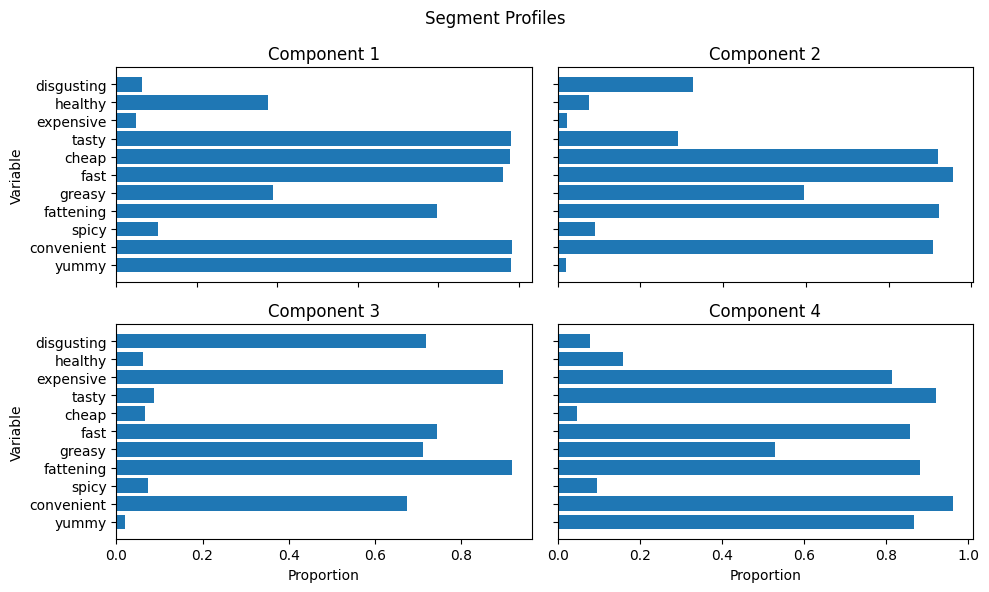

In [34]:
kmeans = kmeans_results['4']
labels = kmeans.labels_
mean = MD.groupby(labels).mean()


fig, axs = plt.subplots(2, 2, figsize=(10, 6))
axs[0, 0].barh(range(mean.shape[1]), mean.iloc[0])
axs[0, 0].set_title('Component 1')
axs[0, 1].barh(range(mean.shape[1]), mean.iloc[1])
axs[0, 1].set_title('Component 2')
axs[1, 0].barh(range(mean.shape[1]), mean.iloc[2])
axs[1, 0].set_title('Component 3')
axs[1, 1].barh(range(mean.shape[1]), mean.iloc[3])
axs[1, 1].set_title('Component 4')


for ax in axs.flat:
    ax.set(ylabel='Variable', xlabel='Proportion')
    ax.set_yticks(range(mean.shape[1]))
    ax.set_yticklabels(MD.columns)

for ax in axs.flat:
    ax.label_outer()

fig.suptitle('Segment Profiles')

fig.tight_layout()

plt.show()


In [35]:
df_encoded.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,6,43,0,0
1,1,1,0,1,1,1,1,1,1,0,0,1,33,0,0
2,0,1,1,1,1,1,0,1,1,1,0,0,44,0,0
3,1,1,0,1,1,1,1,1,0,0,1,3,51,4,0
4,0,1,0,1,1,1,1,0,0,1,0,1,31,3,1


## Step 7: Describing Segments

In [36]:
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

In [37]:
kmeans1 = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(MD)
# data_df = df_encoded.iloc[:,0:11]
MD['cluster_num'] = kmeans1.labels_

In [38]:
rev_mp = {v: k for k, v in mp.items()}

data['Like'] = data['Like'].map(rev_mp)

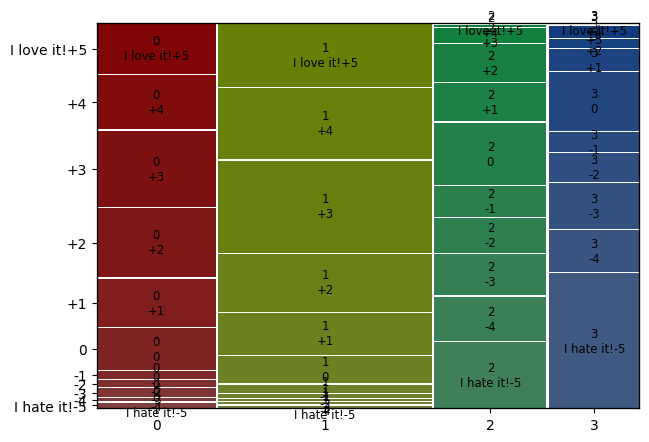

In [39]:
crosstab =pd.crosstab(MD['cluster_num'],data['Like'])
crosstab = crosstab[['I hate it!-5','-4','-3','-2','-1','0','+1','+2','+3','+4','I love it!+5']]
plt.rcParams['figure.figsize'] = (7,5)
mosaic(crosstab.stack())
plt.show()

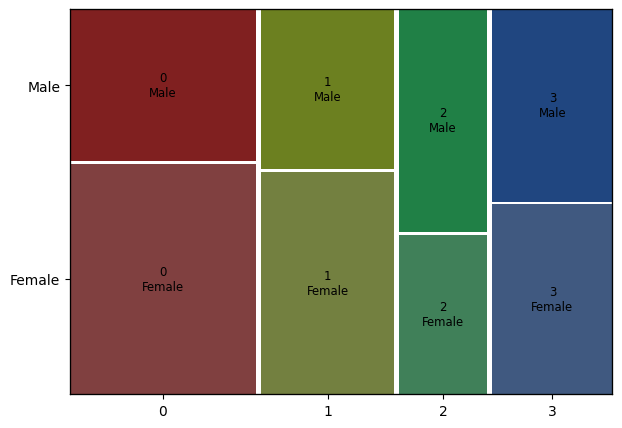

In [40]:
kmeans = kmeans_results['4']
labels = kmeans.labels_

crosstab = pd.crosstab(labels, data['Gender'])
mosaic(crosstab.stack(),gap=0.01)

plt.show()

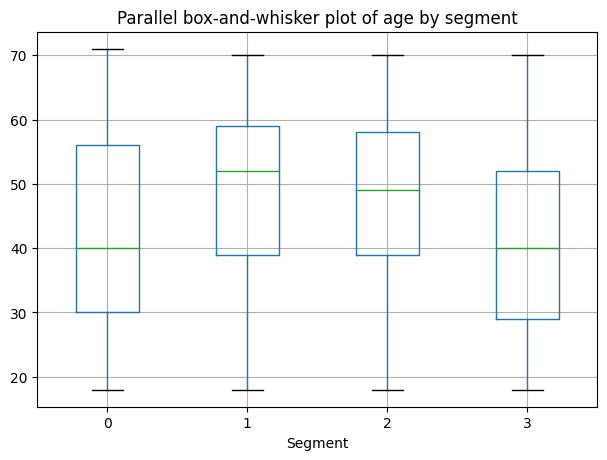

In [41]:
df = pd.DataFrame({'Segment': labels, 'Age': data['Age']})

df.boxplot(by='Segment', column='Age')
plt.title('Parallel box-and-whisker plot of age by segment')
plt.suptitle('')
plt.show()

In [42]:
data_df = df_encoded.iloc[:,0:11]

In [43]:
data_df['cluster_num'] = MD['cluster_num']
data_df[['Like', 'Age', 'VisitFrequency', 'Gender']] = df_encoded[['Like', 'Age', 'VisitFrequency', 'Gender']]

In [44]:
data_df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,cluster_num,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,2,6,43,0,0
1,1,1,0,1,1,1,1,1,1,0,0,0,1,33,0,0
2,0,1,1,1,1,1,0,1,1,1,0,0,0,44,0,0
3,1,1,0,1,1,1,1,1,0,0,1,1,3,51,4,0
4,0,1,0,1,1,1,1,0,0,1,0,2,1,31,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,1,0,1,3,9,29,5,1
1449,1,1,0,1,0,0,1,1,0,1,0,1,1,18,4,0
1450,1,1,0,1,0,1,0,1,1,0,0,0,2,34,3,0
1451,1,1,0,0,0,1,1,1,0,1,0,1,3,23,0,1


## Step 8: Selecting (the) Target Segment(s)

In [45]:
visit = data_df.groupby('cluster_num')['VisitFrequency'].mean()
like = data_df.groupby('cluster_num')['Like'].mean()
gen = data_df.groupby('cluster_num')['Gender'].mean()

In [46]:
visit = visit.to_frame().reset_index()
like = like.to_frame().reset_index()
gen = gen.to_frame().reset_index()

In [47]:
visit

,cluster_num,VisitFrequency
0,0,2.547988
1,1,2.584483
2,2,2.822368
3,3,2.654472


In [48]:
like

,cluster_num,Like
0,0,3.798762
1,1,3.794828
2,2,5.430921
3,3,6.739837


In [49]:
gen

,cluster_num,Gender
0,0,0.523220
1,1,0.398276
2,2,0.411184
3,3,0.569106


## Extended portion of Step 5

In [50]:
def fit_regression(X_segment, y_segment):
    X_const = add_constant(X_segment)  
    model = OLS(y_segment, X_const).fit()
    return model

In [51]:
import matplotlib.pyplot as plt

attr = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy',
              'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']
X = data_df[attr]
y = data_df['Like']


gmm = GaussianMixture(n_components=2, random_state=42)
gmm.fit(X)
segments = gmm.predict(X)


seg_1_data = X[segments == 0]
seg_2_data = X[segments == 1]
seg_1_y = y[segments == 0]
seg_2_y = y[segments == 1]


model_1 = fit_regression(seg_1_data, seg_1_y)
model_2 = fit_regression(seg_2_data, seg_2_y)


summ_1 = model_1.summary()
summ_2 = model_2.summary()
print(summ_1)
print(summ_2)

                            OLS Regression Results                            
Dep. Variable:                   Like   R-squared:                       0.240
Model:                            OLS   Adj. R-squared:                  0.224
Method:                 Least Squares   F-statistic:                     15.29
Date:                Sun, 08 Dec 2024   Prob (F-statistic):           5.06e-26
Time:                        16:30:23   Log-Likelihood:                -1303.8
No. Observations:                 545   AIC:                             2632.
Df Residuals:                     533   BIC:                             2683.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.5779      0.542     12.130      0.0

In [52]:
def extract_coefficients(model):
    coeffs = model.params
    pvalues = model.pvalues
    confidence_intervals = model.conf_int()
    return pd.DataFrame({
        'coefficient': coeffs,
        'pvalue': pvalues,
        'lower_ci': confidence_intervals[0],
        'upper_ci': confidence_intervals[1]
    })


def plot_coefficients(coeffs, title):
    plt.figure(figsize=(8, 6))
    coeffs = coeffs.iloc[1:]  
    bar_colors = ['darkgrey' if p < 0.05 else 'lightgrey' for p in coeffs['pvalue']]
    plt.barh(coeffs.index, coeffs['coefficient'], color=bar_colors, alpha=0.8)
    plt.errorbar(coeffs['coefficient'], coeffs.index,
                 xerr=[coeffs['coefficient'] - coeffs['lower_ci'],
                       coeffs['upper_ci'] - coeffs['coefficient']],
                 fmt='o', color='black')
    plt.axvline(0, color='red', linestyle='--', linewidth=1)
    plt.title(title)
    plt.xlabel("Regression Coefficient")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()


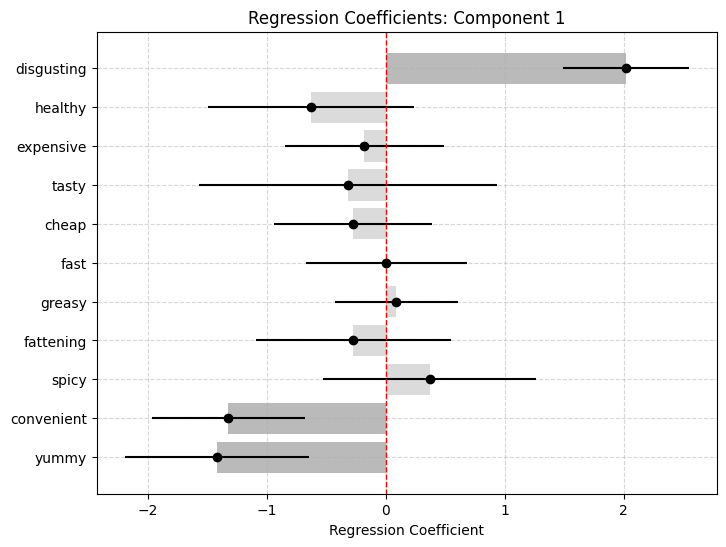

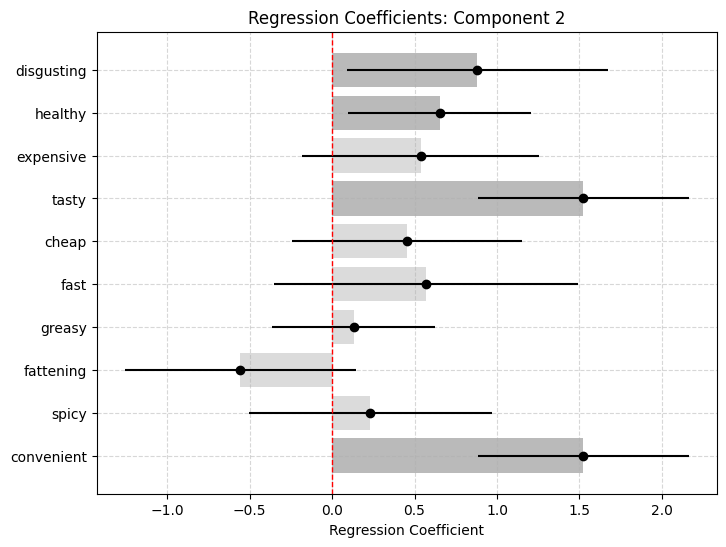

In [53]:
coeff_1 = extract_coefficients(model_1)
coeff_2 = extract_coefficients(model_2)

plot_coefficients(coeff_1, "Regression Coefficients: Component 1")
plot_coefficients(coeff_2, "Regression Coefficients: Component 2")